<h2 style='text-align:center;'> Diabetes Risk Prediction Analysis </h2>

**Features in the dataset**

| Feature |        Description |
|:---------| :--------------------------|
|Age | Age of the patient |
| Sex | Gender of the patient |
| BMI | body mass index, a measure of body fat based on height and weight |
| bp | Average blood pressure |
| S1| T-Cells count |
| S2 | Low desntiy lipoprotiens LDL - "bad" cholesterol |
| S3 | High Density lipoprotiens HDL - "good" cholesterol|
| S4| Total cholesterol |
| S5 | Serum triglycerides level, a form of fat in teh blood |
| S6 | Blood sugar level (glucose) |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score 

In [3]:
from sklearn.datasets import load_diabetes


In [4]:
data = load_diabetes()

In [7]:
type(data)

sklearn.utils.Bunch

In [5]:
df = pd.DataFrame(data = data.data, columns=data.feature_names)

In [13]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
data.target[:5]

array([151.,  75., 141., 206., 135.])

In [41]:
df.shape

(442, 10)

In [17]:
len(data.target)

442

In [18]:
type(data.target)

numpy.ndarray

In [21]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [26]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

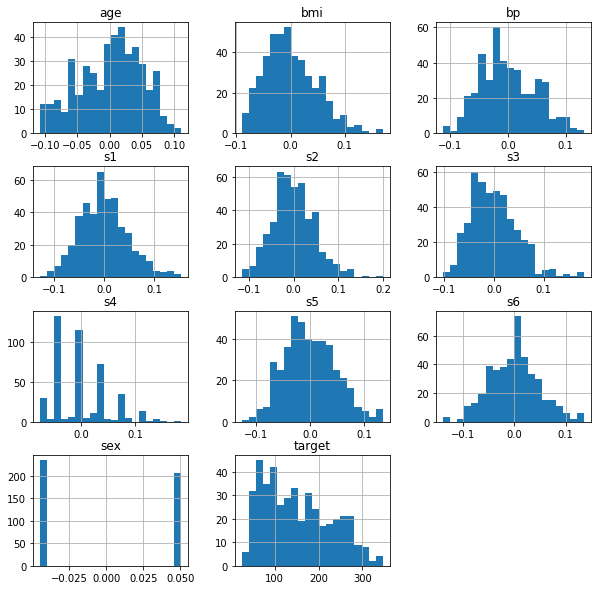

In [36]:
# visualize the distribution of features 

df.hist(bins=20, figsize=(10,10))
plt.show()

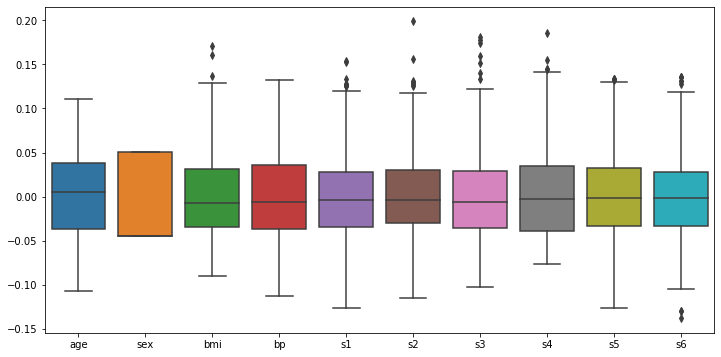

In [42]:
# inspecting for outliers 

plt.figure(figsize=(12,6))
sns.boxplot(data=df)

In [30]:
df['target'] = data.target

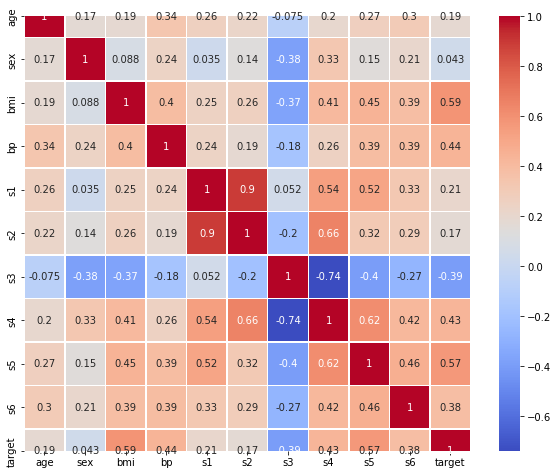

In [31]:
# Correlation Analysis

correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidths=0.5)
plt.show()

<Figure size 1008x1008 with 0 Axes>

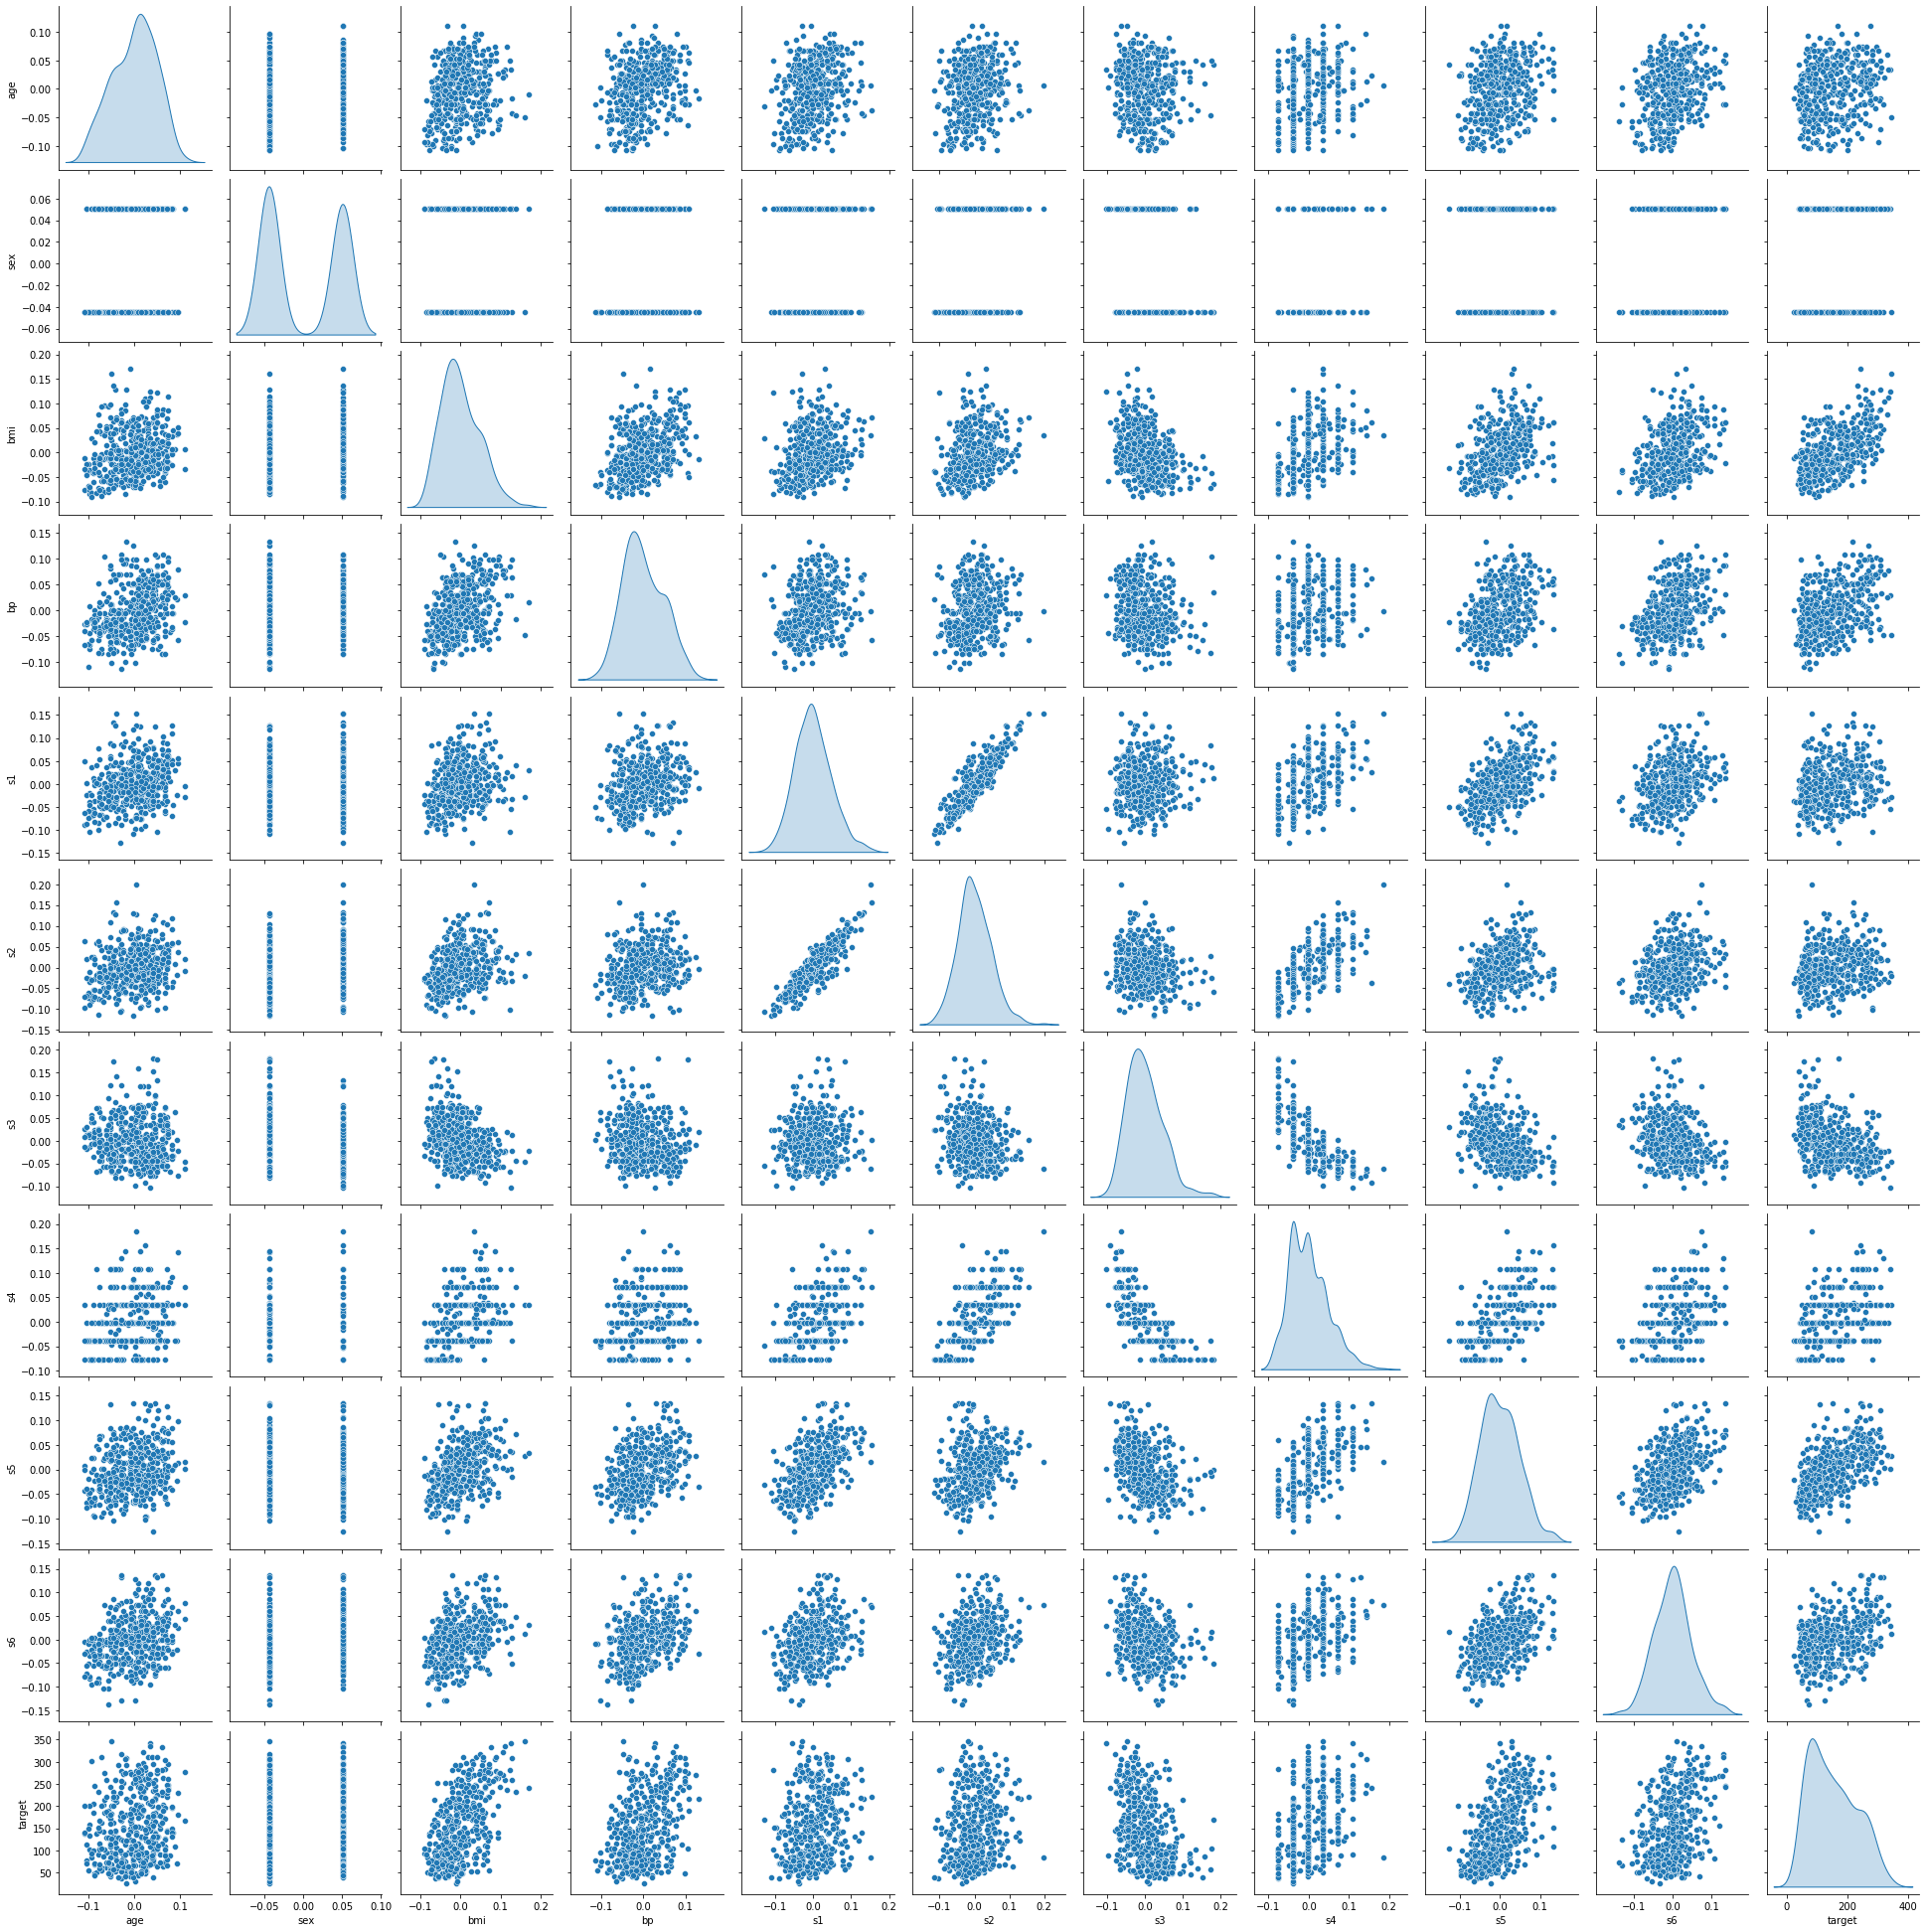

In [33]:
plt.figure(figsize=(14,14))
sns.pairplot(df, diag_kind='kde')
plt.show()

In [6]:
Y = data.target

#### Model Selection ####
------

In [7]:
# split data
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

Linear Regression

In [8]:
len(x_train), len(y_train), len(x_test)

(353, 353, 89)

In [9]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
y_pred = LR_model.predict(x_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f' MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

 MSE: 3445.79
R-squared: 0.47


In [11]:
LR_model.coef_

array([  25.52689558, -237.35371859,  527.02799175,  330.72591819,
       -651.95269732,  317.00387149,   70.10195027,  157.9766277 ,
        692.58160574,  109.39010789])

In [26]:
len(LR_model.coef_)

10

In [30]:
LR_model.intercept_

151.9524567502752

In [12]:
coeff = pd.DataFrame(LR_model.coef_, df.columns, columns=['Coefficient'])
print(coeff)

     Coefficient
age    25.526896
sex  -237.353719
bmi   527.027992
bp    330.725918
s1   -651.952697
s2    317.003871
s3     70.101950
s4    157.976628
s5    692.581606
s6    109.390108


In [71]:
coeff = pd.DataFrame(LR_model.coef_, df.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(coeff)

     Coefficient
s5    692.581606
bmi   527.027992
bp    330.725918
s2    317.003871
s4    157.976628
s6    109.390108
s3     70.101950
age    25.526896
sex  -237.353719
s1   -651.952697


In [ ]:
#from sklearn.preprocessing import standardScaler

**Random Forest Regressor**

[0.         0.         0.24735957 0.06163518 0.         0.
 0.01742302 0.         0.60685776 0.06672447]


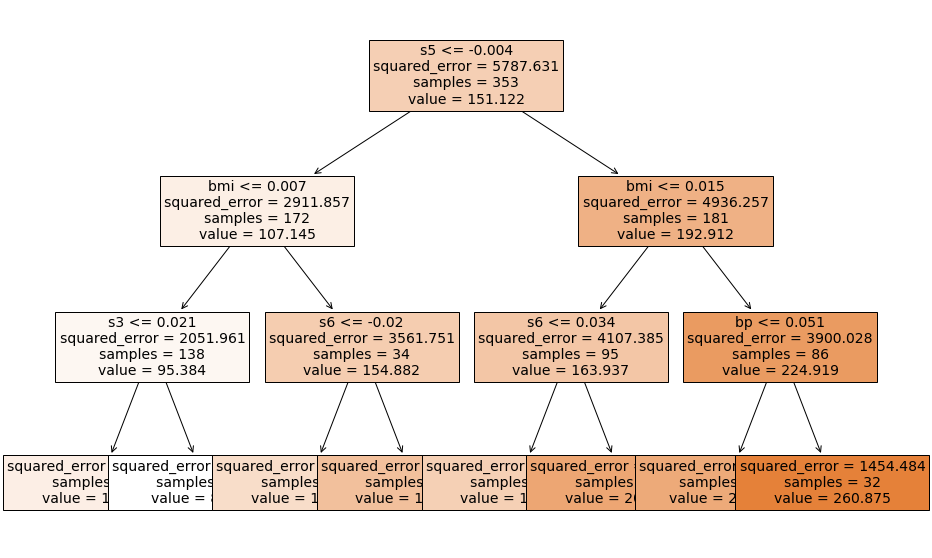

In [59]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree

dt_model = DecisionTreeRegressor(max_depth=3)
dt_model.fit(x_train, y_train)

print(dt_model.feature_importances_)

plt.figure(figsize=(15,10))

plot_tree(dt_model, feature_names=data.feature_names, filled = True, fontsize=14)
plt.show()

In [44]:
importances = dt_model.feature_importances_

In [45]:
feature_importance_df= pd.DataFrame({'feature':df.columns,'importance':importances}).sort_values(by='importance',ascending=False)
print(feature_importance_df)

  feature  importance
8      s5    0.606858
2     bmi    0.247360
9      s6    0.066724
3      bp    0.061635
6      s3    0.017423
0     age    0.000000
1     sex    0.000000
4      s1    0.000000
5      s2    0.000000
7      s4    0.000000


In [37]:
dt_pairs = zip(data.feature_names, dt_model.feature_importances_)

In [40]:
for feature, importance in dt_pairs:
    print(f"{feature}: {importance:.04f}")

In [36]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)

print(rf_model.feature_importances_)

[0.05690721 0.00939443 0.21589465 0.10757203 0.0422482  0.04884434
 0.04901626 0.02199875 0.37334378 0.07478035]


In [47]:
rf_importances = rf_model.feature_importances_

feature_importance_rf= pd.DataFrame({'feature':df.columns,'importance':rf_importances}).sort_values(by='importance',ascending=False)
print(feature_importance_rf)

  feature  importance
8      s5    0.373344
2     bmi    0.215895
3      bp    0.107572
9      s6    0.074780
0     age    0.056907
6      s3    0.049016
5      s2    0.048844
4      s1    0.042248
7      s4    0.021999
1     sex    0.009394


### Evaluating the Models ### 

R^2 score and mean square error MSE

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f' MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

In [53]:
lr_mse =mean_squared_error(y_test, LR_model.predict(x_test))
lr_r2 = r2_score(y_test, LR_model.predict(x_test))

rf_mse = mean_squared_error(y_test, rf_model.predict(x_test) )
rf_r2 = r2_score(y_test, rf_model.predict(x_test))

print(f'Linear Regression R2: {lr_r2:.4}')
print(f'Linear Regression MSE: {lr_mse:0.4f}\n')


print(f'Random Forest R2: {rf_r2:.4}')
print(f'Random Forest MSE: {rf_mse:0.4f}\n')


Linear Regression R2: 0.4677
Linear Regression MSE: 3445.7872

Random Forest R2: 0.4022
Random Forest MSE: 3869.8714



### Evaluation of the two models ###

Linear Regression model is performing better based on R value (0.4677) vs a little lower R2 value produced by Random Forest (0.4022). MSE of Linear Regession model is also lower than that of random forest. 

R2 and MSE scores are not great with both models

<div style = 'color: red; text-align:center;'> <h3> Insights from Modeling the Dataset </h3>
    </div>

This diabetes dataset available from scikit-learn library is a classic sample used for regression task. Modeling this dataset allow for undertanding which features play bigger role in predicting disease progression.  

Based on our analysis, we see that BMI, serum triglycerides levels (S5), blood pressure, blood sugar level, and LDL or lower cholestrol level (S2) are teh most significan predictors of diabetes progression. Interestingly, BMI and S5 are more significan predictors that blood level of sugar. 

Such analysis can help predict patients at risk before developing diabetes. Interventions in this case help delay or/and progress to the disease. 



In [23]:
rf_model = RandomForestRegressor()

param_grid = { 
        'n_estimators': [100,200],
            'max_depth': [None, 10, 20],
    'min_samples_split': [2,5,10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5) #scoring='neg_mean_square_error')
rf_model.fit(x_train, y_train)

#print('Best parameters found: ', grid_search.best_params_)

RandomForestRegressor()

In [24]:
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]})


In [25]:
#print('Best parameters found: ', grid_search.best_params_)
print("Best parameters found: ", grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

**XGBoost (Extreme Gradient Boosting)**

In [77]:
#pip install xgboost

## import xgboost as xgb

xgb_model = xgb.XGBRegressor()

xgb_model.fit(x_train, y_train)

xgb_y = xgb_model.predict(x_test)

xgb_mse = mean_squared_error(y_test, xgb_y)

xgb_r2 = r2_score(y_test, xgb_y)



In [76]:
print(f'Means Squared Error: {xgb_mse:.2f}')
print(f'R2 score: {xgb_r2:.2f}')

Means Squared Error: 4780.16
R2 score: 0.26
